**Visualizing Titanic Data**

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Read the titanic.csv file into a pandas dataframe.**

In [19]:
passengers = pd.read_csv("titanic_dataset.csv")

**Use the head function to present the initial 5 dataframe rows.**

In [21]:
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Basic summary of passenger dataset**

In [103]:
# Basic summary of dataset
print(passengers.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeGroup     714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB
None


**Descriptive statistics (e.g., mean, std, min, max) for numerical columns.**

In [94]:
# Descriptive statistics (including, mean, std, min, max) of numerical columns
print(passengers.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


**Scatter plot showing the relationship of survivals to passenger class.**

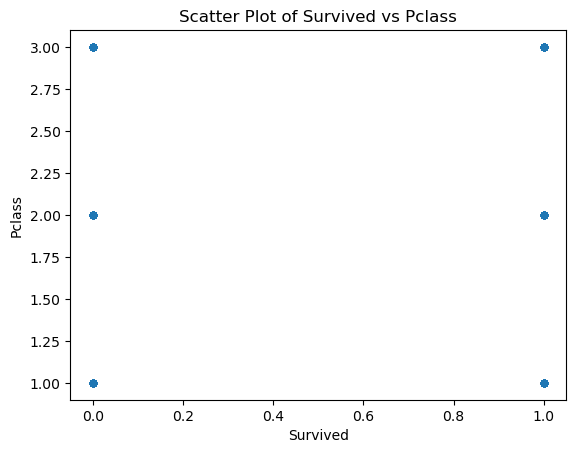

In [37]:
passengers.plot(kind='scatter', x='Survived', y='Pclass')

# Add a title to the plot
plt.title('Scatter Plot of Survived vs Pclass')

# Display the plot
plt.show()

**Pie chart displaying the composition of ages.**

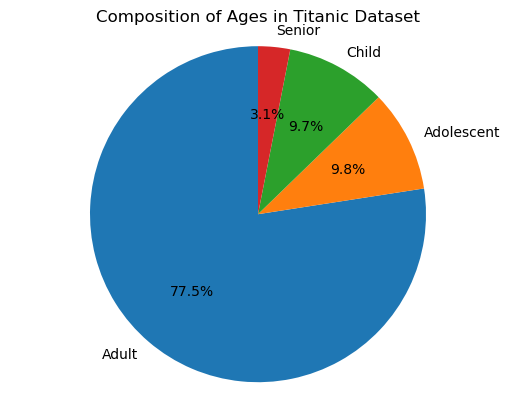

In [40]:
# Define age categories
bins = [0, 12, 18, 60, float('inf')]  # Age groups: 0-12, 13-18, 19-60, 60+
labels = ['Child', 'Adolescent', 'Adult', 'Senior']

# Create a new column for age categories
passengers['AgeGroup'] = pd.cut(passengers['Age'], bins=bins, labels=labels)

# Get count of each age group
age_group_counts = passengers['AgeGroup'].value_counts()

# Create pie chart
plt.pie(age_group_counts.values, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Composition of Ages in Titanic Dataset')

# Equal aspect ratio so that pie is drawn as a circle
plt.axis('equal')

# Display chart
plt.show()

**Calculate overall survival rates.**

In [42]:
# Calculate the overall survival rate
survival_rate = passengers['Survived'].mean() * 100

# Print result
print(f"Overall survival rate: {survival_rate:.2f}%")

Overall survival rate: 38.38%


**Bar chart showing overall survival rates based on sex.**

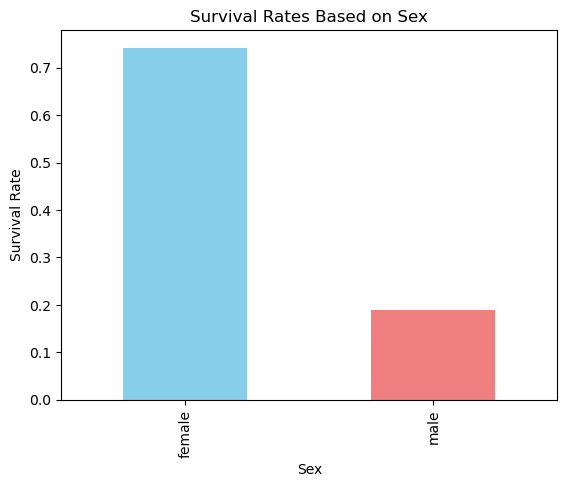

In [63]:
# Group by 'Sex' and calculate the mean of 'Survived' for each group
survival_by_sex = passengers.groupby('Sex')['Survived'].mean()

# Plot the survival rates as bar chart
survival_by_sex.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rates Based on Sex')

plt.show()

**Distributions of age, passenger class, and sex displayed with bar charts and a histogram with KDE.**

C:\Users\snide\AppData\Local\Temp\ipykernel_37464\1534906480.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=passengers, palette='Set2', ax=axes[1])
C:\Users\snide\AppData\Local\Temp\ipykernel_37464\1534906480.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=passengers, palette='pastel', ax=axes[2])


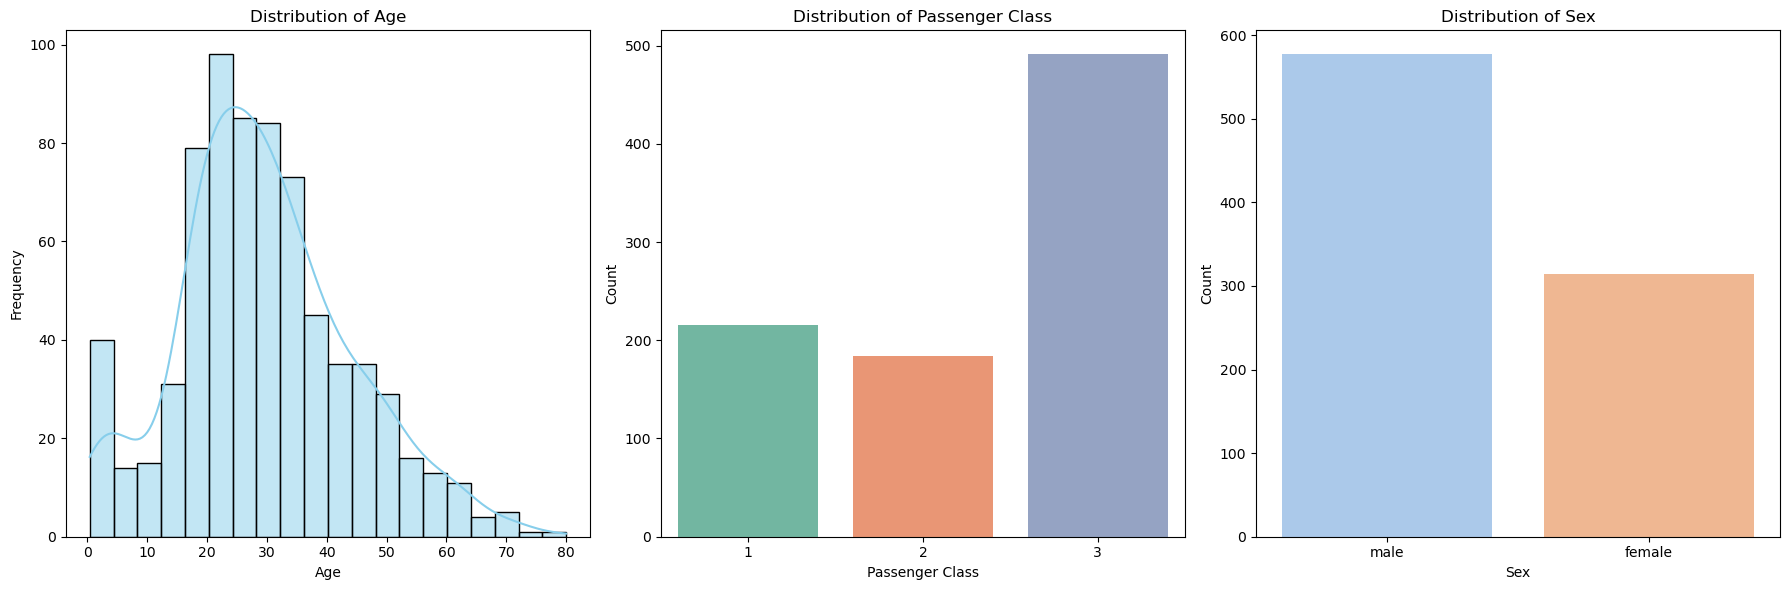

In [59]:
# Set up the plotting area (3 subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Distribution of Age (Histogram with KDE)
sns.histplot(passengers['Age'], kde=True, bins=20, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# 2. Distribution of Passenger Class (Bar Chart)
sns.countplot(x='Pclass', data=passengers, palette='Set2', ax=axes[1])
axes[1].set_title('Distribution of Passenger Class')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Count')

# 3. Distribution of Sex (Bar Chart)
sns.countplot(x='Sex', data=passengers, palette='pastel', ax=axes[2])
axes[2].set_title('Distribution of Sex')
axes[2].set_xlabel('Sex')
axes[2].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()


# Display the plots
plt.show()

**Bar chart showing the the rate of survival based on passenger class.**

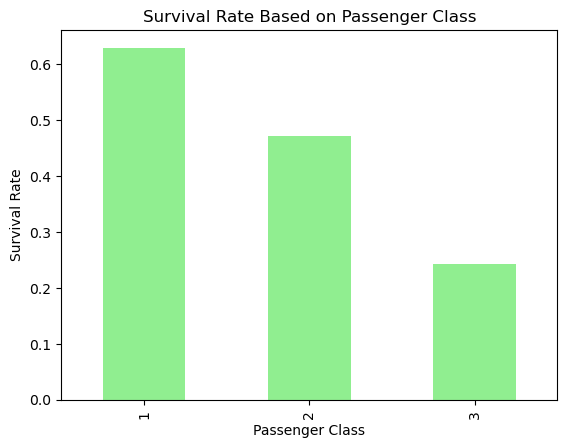

In [48]:
# Group by 'Pclass' and calculate the mean survival rate for each class
survival_by_class = passengers.groupby('Pclass')['Survived'].mean()

# Plot survival rates based on class
survival_by_class.plot(kind='bar', color='lightgreen')

# Add labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Based on Passenger Class')

# Display the plot
plt.show()

**Analyze & display the spread and central tendency of fares, displaying the mean, median and standard deviation, while using a histogram.** 

Mean Fare: 32.20
Median Fare: 14.45
Standard Deviation of Fare: 49.69


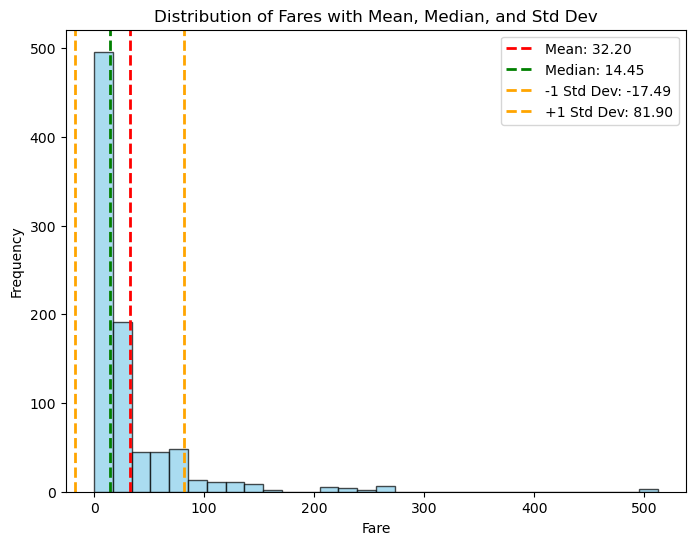

In [50]:
# Calculate the mean, median, and standard deviation of the 'Fare' column
mean_fare = passengers['Fare'].mean()
median_fare = passengers['Fare'].median()
std_fare = passengers['Fare'].std()

# Print the calculated statistics
print(f"Mean Fare: {mean_fare:.2f}")
print(f"Median Fare: {median_fare:.2f}")
print(f"Standard Deviation of Fare: {std_fare:.2f}")

# Plot a histogram to visualize the distribution of the 'Fare'
plt.figure(figsize=(8, 6))
plt.hist(passengers['Fare'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add vertical lines for the mean, median, and standard deviation
plt.axvline(mean_fare, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_fare:.2f}')
plt.axvline(median_fare, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_fare:.2f}')
plt.axvline(mean_fare - std_fare, color='orange', linestyle='dashed', linewidth=2, label=f'-1 Std Dev: {mean_fare - std_fare:.2f}')
plt.axvline(mean_fare + std_fare, color='orange', linestyle='dashed', linewidth=2, label=f'+1 Std Dev: {mean_fare + std_fare:.2f}')

# Add labels and title
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fares with Mean, Median, and Std Dev')

# Show legend
plt.legend()

# Display plot
plt.show()

**Correlate and display fare and passenger class with a scatter plot.**

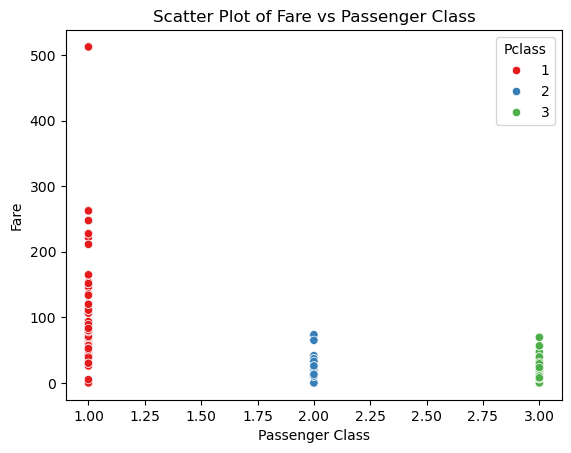

In [88]:
# Scatter plot to visualize Fare vs Pclass
sns.scatterplot(data=passengers, x='Pclass', y='Fare', hue='Pclass', palette='Set1', marker='o')

# Add title and labels
plt.title('Scatter Plot of Fare vs Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

# Display the plot
plt.show()